# Representação de uma imagem, espaço de cor e carregar imagens
- Uma imagem nada mais é do que um grupo de matrizes 2D (normalmente, 3) que representa algum espaço de cor
- Um **espaço de cor** nada mais é do que um padrão que organiza como as cores são representadas
- O padrão mais utilizado é o RGB (red, green, blue)
    - Nesse padrão, cada pixel possui 3 valores que representam a intensidade de cada uma 3 cores fundamentais
    - A intensidade normalmente vai de 0 a 255, mas pode ser normalizado para 0 a 1
     
    
    
![](assets/img.png)
    
    
- Com essas 3 cores primárias, podemos chegar em "todas" as outras  

![](assets/cores.png)


    
- Existem diversos outros espaços de cores, mas não minha intenção discutir todos eles aqui
    - Saiba mais [neste tutorial](https://www.mathworks.com/help/images/understanding-color-spaces-and-color-space-conversion.html#:~:text=through%20mathematical%20transformations.-,RGB,from%20%5B0%2C%201%5D.)
    
    
___
- Também podemos representar uma imagem níveis de cinza
    - Neste caso, temos uma matriz 2D na qual cada valor representa um nível de cinza do pixel
    - Mesma ideia do RGB, [0-255] ou [0-1]

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Criando imagens
- Podemos criar uma imagem de 500 x 500 pixels em níveis de cinza
- Vamos usar numpy para criar um array aleatória
- E vamos plotar usando matplotlib

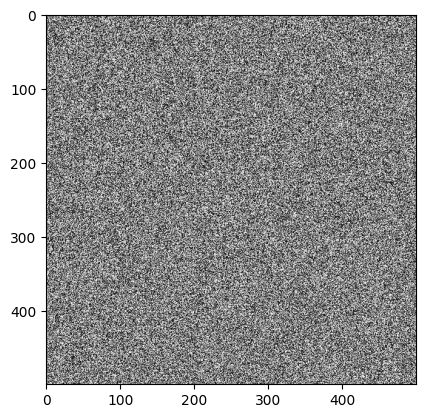

In [65]:
img = np.random.randint(0, 255, (500, 500))
ax = plt.imshow(img, cmap="gray")

- Podemos transformar essa imagem em colorida apenas adicionando mais dois canais para representar as intensidades de Red, Green e Blue

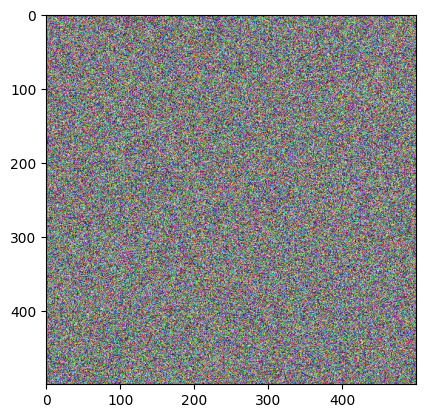

In [66]:
img = np.random.randint(0, 255, (500, 500, 3))
plt.imshow(img)

- Uma com todos os pixels igual a `red=0`, `green=0` e `blue=0`, assume valor preto (ausência de cor)

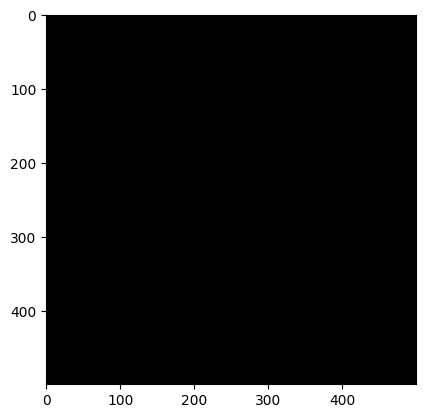

In [67]:
img = np.zeros((500, 500, 3))
plt.imshow(img)

- Uma com todos os pixels igual a `red=255`, `green=255` e `blue=255`, assume valor branco (união de todas as cores)
    - No caso de normalizado, todos os valores assume 1

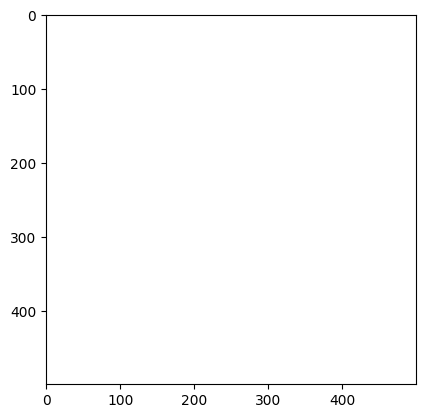

In [68]:
img = np.ones((500, 500, 3))
plt.imshow(img)

- Se temos os 3 valores com mesmo valor (diferente de 0 ou 1), teremos um tom de cinza

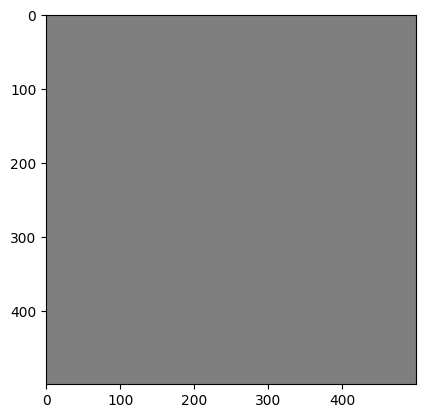

In [69]:
img = np.ones((500, 500, 3)) * 0.5
plt.imshow(img)

- Se setarmos apenas um canal como 255 (ou 1), teremos a cor daquele canal

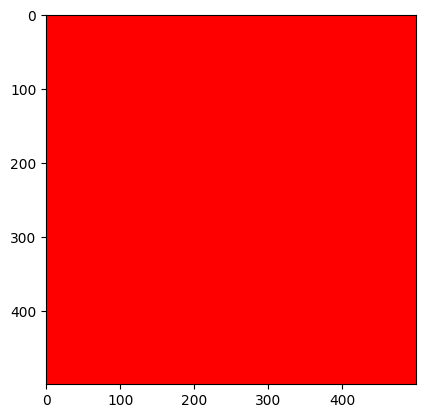

In [70]:
img = np.stack([np.ones((500, 500)), np.zeros((500, 500)), np.zeros((500, 500))], axis=2)
plt.imshow(img)

# Carregando uma imagem com opencv
- Para carregar uma imagem com opencv utilizamos o método `imread()`
    - Esse método recebe o caminho completo até a imagem
    - E nos devolve um `np.ndarray`

In [71]:
goku_img = cv2.imread("assets/goku.png")
type(goku_img)

numpy.ndarray

In [72]:
goku_img.shape

(1239, 696, 3)

- Podemos plotar ela usando matplotlib

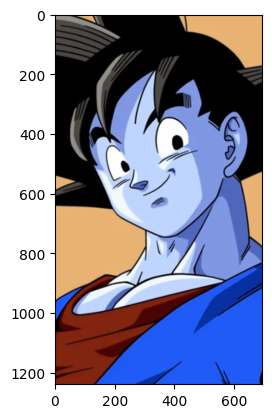

In [73]:
plt.imshow(goku_img)

- Mas espera, tem algo de estranho nessa imagem. Goku está da cor do Caos :o
- Acontece, que por [razões históricas](https://learnopencv.com/why-does-opencv-use-bgr-color-format/#:~:text=Why%20did%20they%20choose%20BGR,use%20the%20BGR%20format%200x00bbggrr.), o OpenCV mantém o padrão BGR ao invés de RGB
- Portanto, os canais R e B estão invertidos
- Podemos realizar uma conversão de maneira fácil usando o método `cvtColor()`

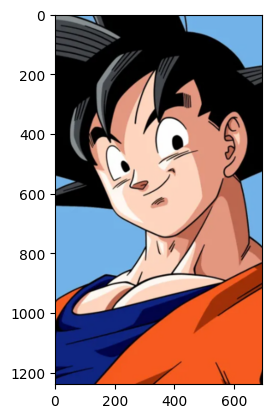

In [74]:
goku_img = cv2.cvtColor(goku_img, cv2.COLOR_BGR2RGB)
plt.imshow(goku_img)

- Agora sim, Goku está apto para salvar a humanidade novamente

# Exercício
- Converta o formato BGR para RGB sem usar OpenCV, apenas NumPy

In [75]:
goku_img = cv2.imread("assets/goku.png")

# Extrair canais B, G e R
b_channel = goku_img[:, :, 0]
g_channel = goku_img[:, :, 1]
r_channel = goku_img[:, :, 2]

# Criar imagem RGB combinando os canais na ordem correta
rgb_image = np.stack((r_channel, g_channel, b_channel), axis=-1)